In [72]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
dataset=pd.read_csv("Maternal Health Risk Data Set.csv")

In [74]:
dataset.shape

(1014, 7)

In [75]:
dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [77]:
dataset.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [78]:
dataset.describe(include='all')

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,low risk
freq,NaN,NaN,NaN,NaN,NaN,NaN,406
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,NaN
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,NaN
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,NaN
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,NaN
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,NaN
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,NaN


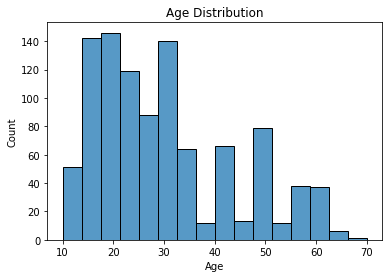

In [79]:
sns.histplot(dataset.Age)
plt.title('Age Distribution')
plt.show()

In [80]:
dataset.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

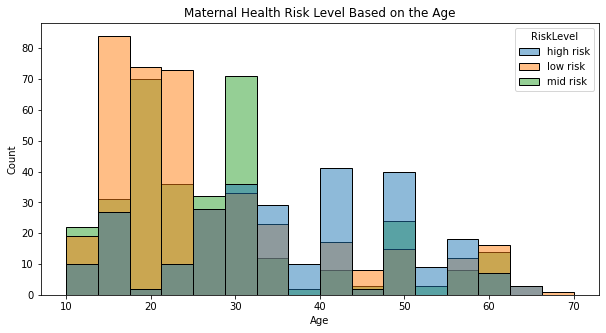

In [81]:
plt.figure(figsize=(10,8))
plt.title("Maternal Health Risk Level Based on the Age")
sns.histplot(x="Age", hue="RiskLevel", data=dataset)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RiskLevel', ylabel='count'>

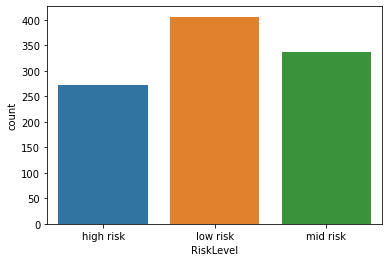

In [82]:
#checking imbalance
sns.countplot(dataset['RiskLevel'])

In [83]:
#Pre-processing data
x=dataset.iloc[:,[0,1,2,3,4,5]].values
y=dataset.iloc[:,6].values

In [84]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
T_y  = le.fit_transform(y)

y_unique = np.unique(y)
T_yunique = np.unique(T_y)
y_encode = dict(zip(y_unique, T_yunique))
print(y_encode)

{'high risk': 0, 'low risk': 1, 'mid risk': 2}


In [85]:
tr_dict = {'low risk':0,
          'mid risk':1,
          'high risk':2}
dataset['RiskLevel'] = dataset['RiskLevel'].map(tr_dict)

dataset

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2
1010,55,120,90,18.0,98.0,60,2
1011,35,85,60,19.0,98.0,86,2
1012,43,120,90,18.0,98.0,70,2


In [86]:
y=dataset.iloc[:,6].values

In [87]:
y

array([2, 2, 2, ..., 2, 2, 1], dtype=int64)

In [88]:
#training data set and spliting
from sklearn.model_selection import train_test_split
x= dataset.drop("RiskLevel", axis=1)
y = dataset['RiskLevel']
accuracy_list = []

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [90]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_s=sc.fit_transform(x_train)
x_test_s=sc.transform(x_test)

In [91]:
#Training by KNN
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train_s, y_train)

KNeighborsClassifier(n_neighbors=1)

In [92]:
y_pred=classifier.predict(x_test_s)
print(y_pred)

[1 1 1 1 2 1 0 2 0 1 1 1 0 1 0 0 1 2 0 0 0 0 0 1 2 1 0 0 2 0 2 1 0 0 1 1 0
 2 1 0 1 0 2 2 0 2 1 0 1 0 2 1 0 1 2 0 2 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 2 2
 0 1 2 1 1 0 0 1 1 2 1 0 2 0 0 0 2 2 2 2 0 0 1 2 0 2 1 2 0 2 1 2 0 1 0 1 1
 0 1 1 0 0 2 0 0 0 1 1 0 1 0 2 0 0 2 0 0 1 1 2 0 2 0 2 2 2 1 0 1 0 1 1 2 0
 1 2 1 2 0 1 0 0 0 0 1 0 1 0 0 2 1 0 1 1 0 1 0 0 1 1 1 1 0 1 2 1 1 2 1 0 2
 2 0 1 1 2 1 0 1 1 1 0 0 1 2 2 1 0 2 0 1 1 2 1 1 1 1 1 0 0 2 2 2 2 1 2 0 2
 1 2 1 2 1 0 2 2 0 0 2 1 0 1 1 0 0 0 0 0 2 0 0 2 0 1 2 2 0 1 1 2 0 2 1 2 2
 2 1 1 2 1 2 0 1 1 0 1 0 0 0 1 2 1 0 2 0 2 0 2 1 2 2 2 1 0 2 2 1 0 1 0 0 2
 2 0 1 0 0 1 1 0 1]


In [93]:
print(y_test)

67     1
836    1
950    0
782    1
285    2
      ..
703    0
155    0
639    0
187    0
926    0
Name: RiskLevel, Length: 305, dtype: int64


In [94]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\\n')
print('--------------------------------------')
result=metrics.classification_report(y_test, y_pred)
print('classification Report:\n')
print(result)

accuracy:0.82


Confusion Matrix:
[[102  20   2]
 [ 13  82  12]
 [  3   4  67]] 
\n
--------------------------------------
classification Report:

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       124
           1       0.77      0.77      0.77       107
           2       0.83      0.91      0.86        74

    accuracy                           0.82       305
   macro avg       0.82      0.83      0.83       305
weighted avg       0.82      0.82      0.82       305



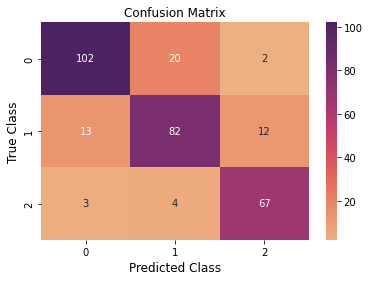

In [95]:
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)

plt.show()